In [57]:
import ticktacktoe
import ticktack
from ticktacktoe.fitting import SingleFitter as Fit
from jax.numpy import arange, array
from time import process_time
from plotnine import ggplot, geom_col, aes
from pandas import DataFrame

In [58]:
MODULES = {
    "ticktack": {
        "pointer": ticktack,
        "tolerance": 1e-15
    }, 
    "ticktacktoe": {
        "pointer": ticktacktoe,
        "tolerance": 1e-5
    }
}

In [59]:
module_times = {"module": [], "time": [], "run": []}

In [60]:
for module in MODULES:
    carbon_box_model = MODULES[module]["pointer"].load_presaved_model(
        "Guttler14", production_rate_units="atoms/cm^2/s")
    carbon_box_model.compile()

    production_function = Fit(carbon_box_model, "Guttler14").simple_sinusoid

    for run in range(10):
        timer = process_time()
        carbon_box_model.run(
            time_out=arange(0, 800), 
            oversample=108, 
            production=production_function,
            args=array([774.86, 0.25, 0.8, 6.44]),
            steady_state_production=1.76,
            rtol=MODULES[module]["tolerance"],
            atol=MODULES[module]["tolerance"]
        )
        timer = process_time() - timer

        module_times["module"].append(module)
        module_times["time"].append(timer)
        module_times["run"].append(run)

In [61]:
module_times = DataFrame(module_times)

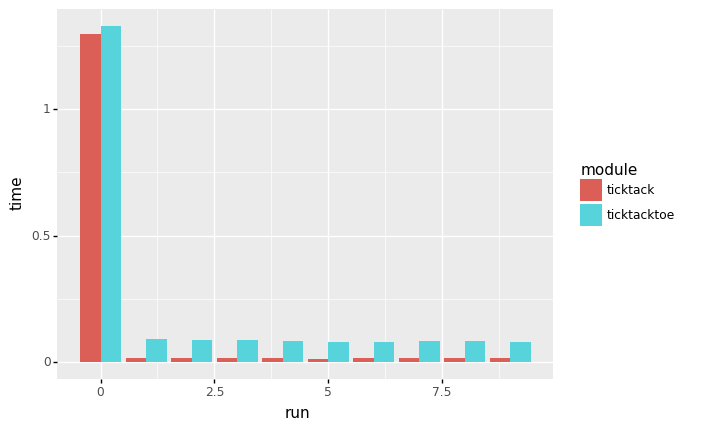

<ggplot: (8763981281687)>

In [64]:
(ggplot(module_times, aes(x="run", y="time", fill="module"))
    + geom_col(position="dodge"))